In [1]:
## Importing helper libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


C:\Users\kkara\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [25]:
## Loading dataset the training only
path = 'C:/Users/kkara/Downloads/dataset/'

df = pd.read_csv(path + 'train.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Purchase by age group

Text(0,0.5,'Number of Purchase')

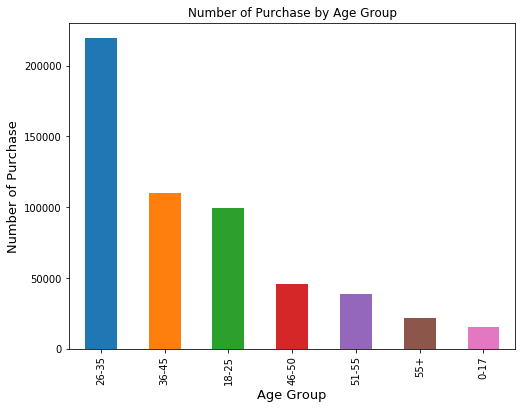

In [4]:
df.Age.value_counts().plot(kind = 'bar', title = 'Number of Purchase by Age Group', figsize =(8,6))
plt.xlabel('Age Group', fontsize = 13)
plt.ylabel('Number of Purchase', fontsize = 13)# Bar Colors

Calculating Purchase mean as per city and age group

In [5]:
age_group_city = df.loc[:,['Age', 'City_Category', 'Purchase']] 
age_group_city = age_group_city.pivot_table(age_group_city, index = ['Age', 'City_Category'], aggfunc = 'mean')

C:\Users\kkara\Anaconda3\lib\site-packages\pandas\plotting\_core.py:211: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn("'color' and 'colormap' cannot be used "
C:\Users\kkara\Anaconda3\lib\site-packages\pandas\plotting\_style.py:31: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn("'color' and 'colormap' cannot be used "


Text(0.5,0,'Purchase Mean')

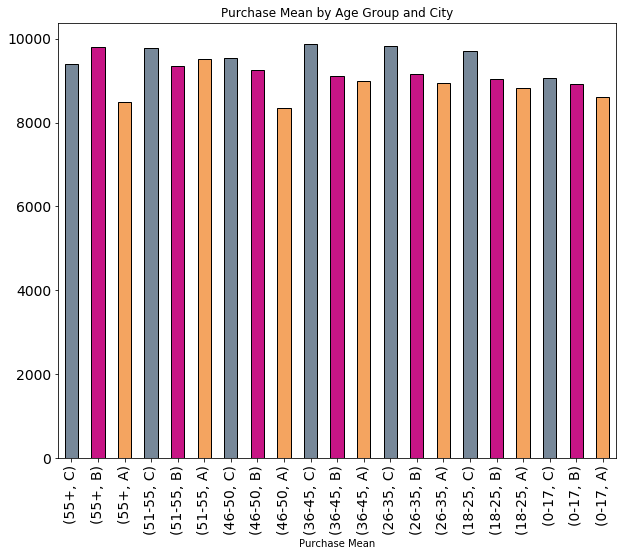

In [6]:
color = ('lightslategray','mediumvioletred','sandybrown') # color pattern for our graph
age_group_city.sort_index(ascending=False).plot(
    kind='bar',
    figsize=(10, 8),
    cmap='viridis',
    edgecolor='black',
    fontsize=14,
    legend = False,
    color = color,
    title='Purchase Mean by Age Group and City',
    
    ).yaxis.label.set_visible(False)
plt.ylabel('Age_Group, City')
plt.xlabel('Purchase Mean')

Furhter Diving into particular age group

In [7]:
def trim(axs, N):
    axs = axs.flatten()
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

color = ('lightslategray','mediumvioletred','sandybrown')

def plots(dataframe, item, title, ax = None):
    obj = dataframe.loc[item,:]  # Select item
    obj.plot( kind = 'barh',
            color = color,
            edgecolor = 'black', 
            ax = ax,   
            legend = None,              
            ).set_title(f'{title} {item}')
    
    ax.set_xlabel('Purchase Mean [$]')

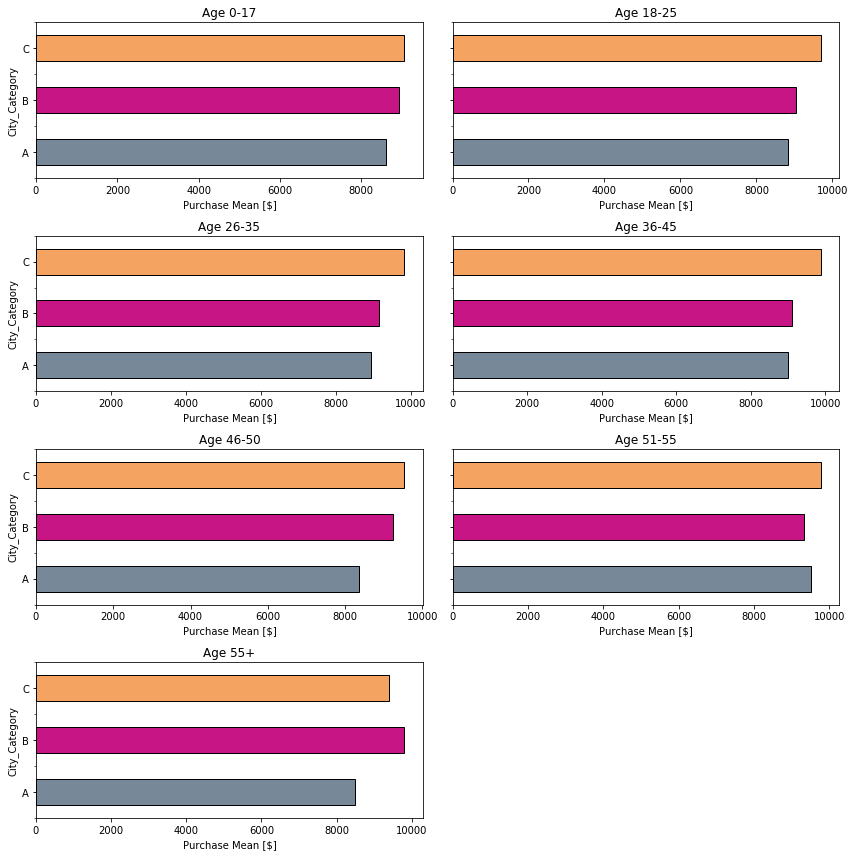

In [8]:
# for y axis
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 12), sharey=True)
ax = trim(ax, len(df.Age.unique()))

# Age Groups
age_list = ['0-17','18-25','26-35','36-45', '46-50','51-55','55+']

# ax.flatten() collapses the ax into one dimension array
for subplot, Age in zip(ax.flatten(), age_list):
    plots(age_group_city, Age, ax=subplot, title = 'Age')
    
plt.tight_layout()

Purchase mean by gender group

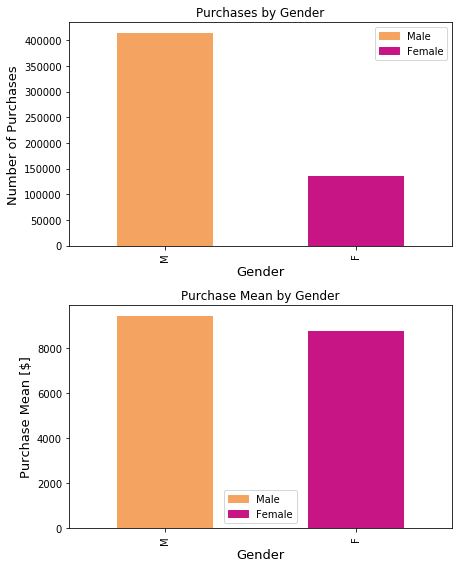

In [14]:
color = ('sandybrown','mediumvioletred')
df.groupby('Gender').mean()['Purchase'].sort_values(ascending = False)

# Plotting Purchase by Gender
plt.subplot(221)
df.Gender.value_counts().plot(kind= 'bar', title = 'Purchases by Gender',color =color)

plt.xlabel('Gender', fontsize = 13)
plt.ylabel('Number of Purchases', fontsize = 13)
import matplotlib.patches as mpatches
gray_patch = mpatches.Patch(color ='sandybrown', label = 'Male')
violet_patch = mpatches.Patch(color = 'mediumvioletred', label = 'Female')
plt.legend(handles = [gray_patch,violet_patch], loc = 'best')



#Plotting Purchase Mean by Gender
plt.subplot(223)

df.groupby('Gender').mean()['Purchase'] .sort_values(ascending = False).plot(kind = 'bar',
                                                                         color = color,
                                                                         title = 'Purchase Mean by Gender')
                                                                    
plt.ylabel('Purchase Mean [$]', fontsize = 13)
plt.xlabel('Gender', fontsize = 13)
plt.legend(handles = [gray_patch,violet_patch], loc = 'best')
plt.tight_layout()

plt.rcParams['figure.figsize'] =(12,8)

Purchase mean by gender and city

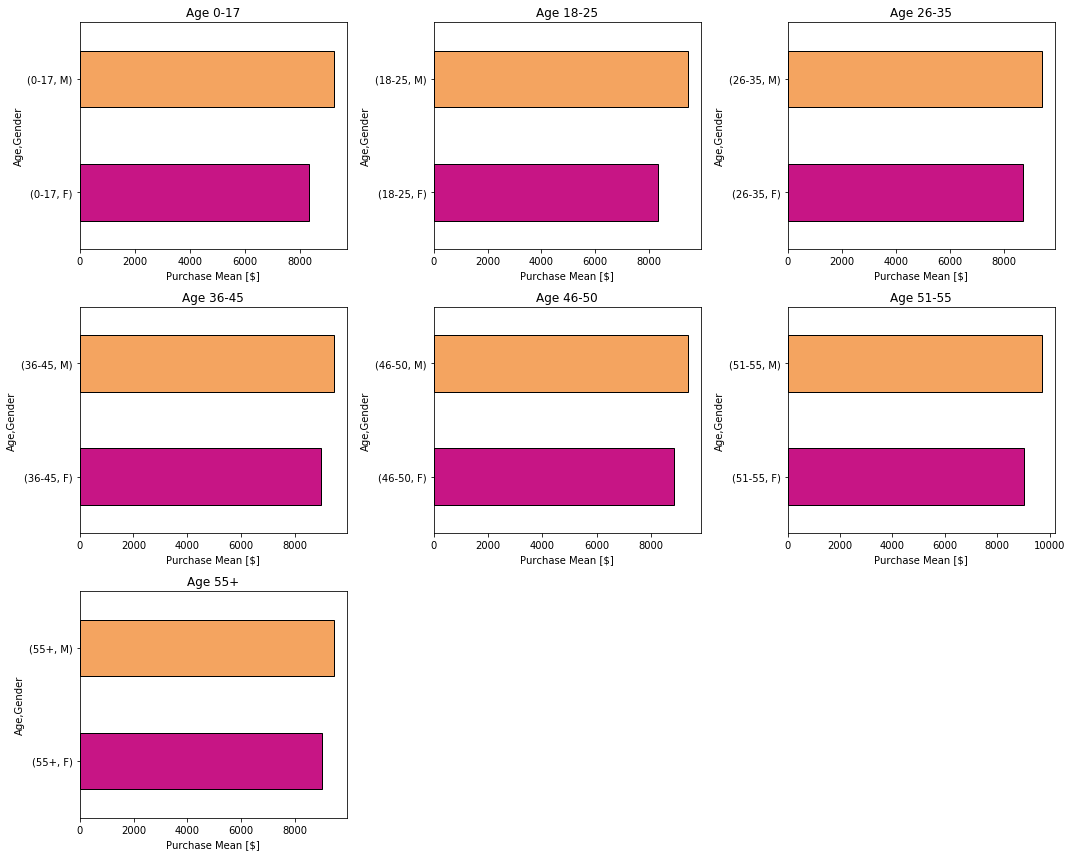

In [12]:
gender_age_pvt = df.pivot_table(df , index = ['Age', 'Gender'], aggfunc = 'mean')['Purchase']
fig, ax = plt.subplots(nrows = 3 , ncols= 3, figsize = (15,12), sharey = False)
ax = trim(ax, len(df.Age.unique())) #correctify the axes length

color = ['mediumvioletred','sandybrown'] #setting colors
for subplot, Age in zip(ax.flatten(),age_list ):
    plots(gender_age_pvt,Age,ax = subplot, title = 'Age')
    
plt.tight_layout()

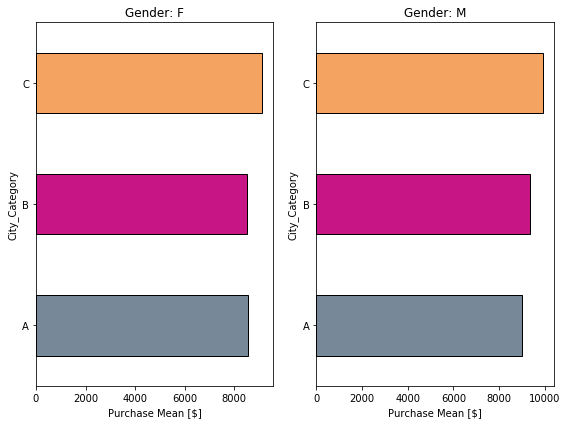

In [16]:
purchase_mean_by_gender_city = df.loc[:,['Gender', 'City_Category','Purchase']]
# Pivot Table with Purchase Mean
pvt_purchase_mean_by_gender_city = purchase_mean_by_gender_city.pivot_table(purchase_mean_by_gender_city, 
                                                                           index = ['Gender','City_Category'],
                                                                           aggfunc = 'mean')
fig, ax = plt.subplots(nrows = 1 , ncols= 2, figsize = (8,6), sharey = False)

# Bar Colors
color = ('lightslategray','mediumvioletred','sandybrown')

gender_list = ['F','M']

for subplot, gender in zip(ax.flatten(),gender_list ):
    plots(pvt_purchase_mean_by_gender_city, gender, ax = subplot, title = 'Gender:')
    
plt.tight_layout()

# Sales of each product as per gender

Text(0.5,1,'Purchases of Each Product Category by Gender')

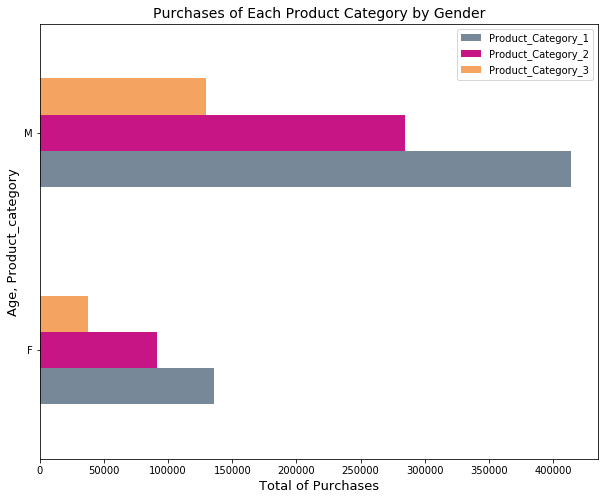

In [17]:
Purchase_by_gender_df = df.loc[:,[ 'Gender','Product_Category_1', 'Product_Category_2','Product_Category_3']] 

# Pivot Table
Purchase_by_gender_Pivt = Purchase_by_gender_df.pivot_table(Purchase_by_gender_df, index = ['Gender'], aggfunc = 'count')

#Barplot
Purchase_by_gender_Pivt.plot( kind = 'barh',figsize =(10,8), color = color)


#Create Legend
plt.xlabel('Total of Purchases', fontsize = 13)
plt.ylabel('Age, Product_category', fontsize = 13)
plt.title('Purchases of Each Product Category by Gender', fontsize = 14 )

 Number of purchases of each product category by city

Text(0.5,1,'Purchases of Each Product Category by City')

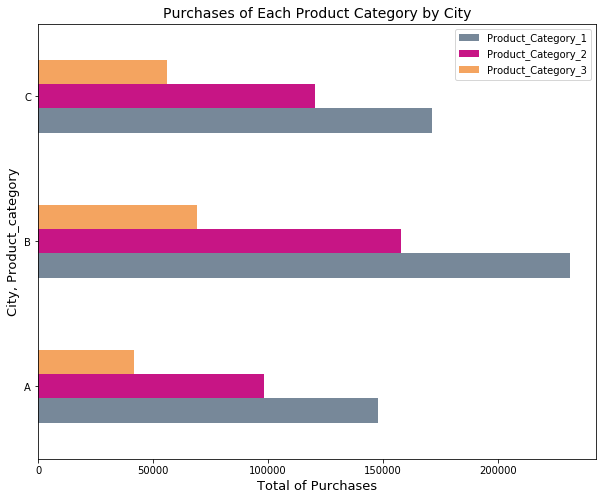

In [18]:
# Select Dataframe
Purchase_by_City_df = df.loc[:,[ 'City_Category','Product_Category_1', 'Product_Category_2','Product_Category_3']] 

# Pivot Table
Purchase_by_City_Pivt = Purchase_by_City_df.pivot_table(Purchase_by_City_df, index = ['City_Category'], aggfunc = 'count')

#Barplot
Purchase_by_City_Pivt.plot( kind = 'barh',figsize =(10,8), color = color)


#Create Legend
plt.xlabel('Total of Purchases', fontsize = 13)
plt.ylabel('City, Product_category', fontsize = 13)
plt.title('Purchases of Each Product Category by City', fontsize = 14 )

Diving into the Product_category_1.
Since product_category_1 is one that has more number of sales

In [19]:
df_city_A = df.loc[df.City_Category == 'A', :]
df_city_B = df.loc[df.City_Category == 'B', :]
df_city_C = df.loc[df.City_Category == 'C', :]

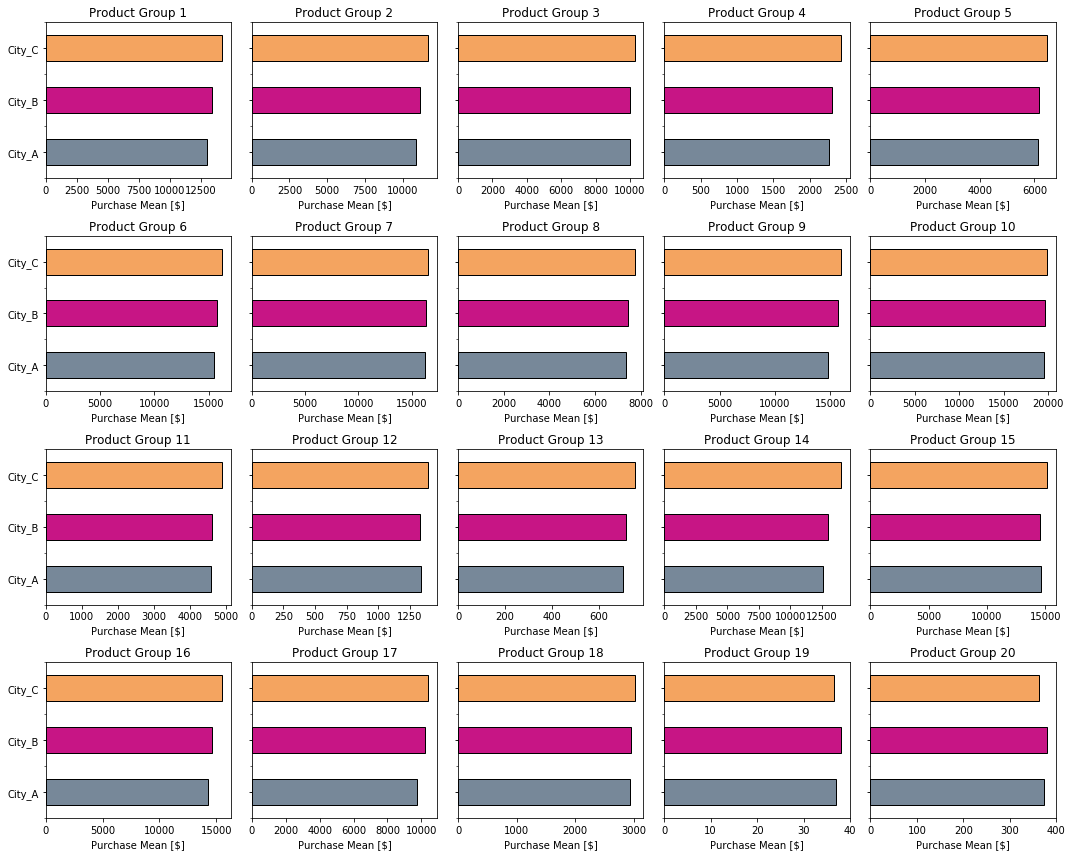

In [21]:
# Groupby each dataframe - Series with the number of purchases
City_A_Category_1 = df_city_A.groupby('Product_Category_1').mean()['Purchase']
City_B_Category_1 = df_city_B.groupby('Product_Category_1').mean()['Purchase']
City_C_Category_1 = df_city_C.groupby('Product_Category_1').mean()['Purchase']

# Concatenate all series
prod1_df = pd.concat([City_A_Category_1,City_B_Category_1, City_C_Category_1], axis = 1)
# Set columns name
prod1_df.columns = ['City_A', 'City_B', 'City_C']
#setup 4 x 5 subplot grid
fig, ax = plt.subplots(nrows = 4 , ncols= 5, figsize = (15,12), sharey = True)

#correct the lenght of the ax
#ax = trim_axs(ax, len(df.Product_Category_1.unique()))

color = ['lightslategray','mediumvioletred','sandybrown']

product_category_1_list = sorted(list(df.Product_Category_1.unique()))

for subplot, product in zip(ax.flatten(),product_category_1_list ):
    plots(prod1_df,product,ax = subplot, title = 'Product Group')
    
plt.tight_layout()

Some preprocessing. Converting the categorical data 

In [26]:
df['Age']=df.Age.map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':4,'51-55':5,'55+':6}).astype(np.float)
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.extract('(\d+)').astype(np.float)
df['Gender']=df.Gender.map({'F':0,'M':1}).astype(np.float)
df['City_Category']=df.City_Category.map({'A':0,'B':1,'C':2}).astype(np.float)
df['Product_ID']=df['Product_ID'].str.extract('(\d+)').astype(np.float)
df['User_ID']=df['User_ID']%1000000
df = df.fillna(0)

Heatmap and ClusterMap

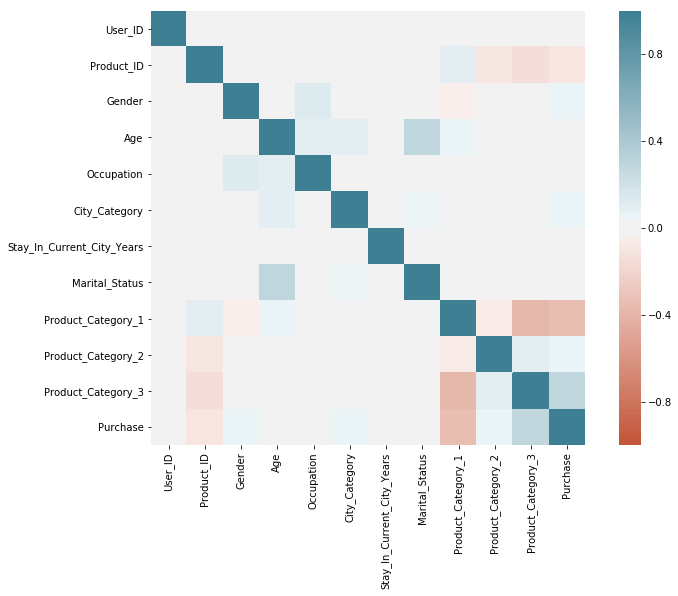

In [27]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)



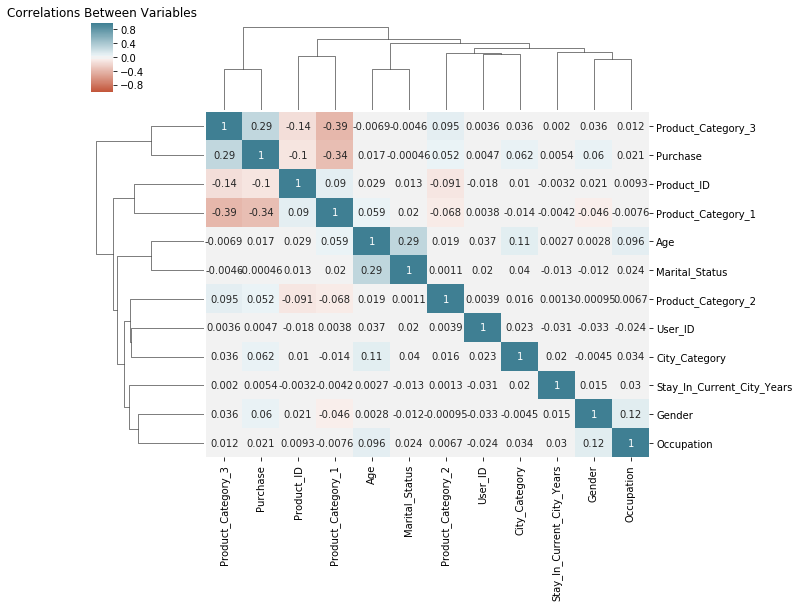

In [28]:
sns.clustermap(corr, method='ward', cmap=sns.diverging_palette(20, 220, n=200), annot=True,
               vmin=-1, vmax=1, figsize=(10,8))

plt.title("Correlations Between Variables")
#plt.tight_layout()
plt.show()